-------------------------------------------
Importing Libraries

In [1]:

import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction import text
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
import sklearn.model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer



-------------------------------------------
Importing Dataset

In [2]:
# importing dataset by using Pandas library.
urdu_doc=pd.read_csv('/content/Hate Speech Detection in Arabic Urdu -  labeled_data.csv.csv' , encoding='utf8' )

In [3]:
urdu_doc = urdu_doc.dropna()
urdu_doc.shape

(24783, 7)

In [4]:
urdu_doc.head()

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: ایک عورت کے طور پر آپ ک...
1,1,3,0,3,0,1,!!!!! RT @mleew17: لڑکا ٹھنڈا ہے... ٹائیگا ڈا...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbab...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based وہ ای...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: آپ نے میرے ...




```
# This is formatted as code
```

-------------------------------------------
Mapping into Labels

In [5]:
urdu_doc['Class'].unique()

array([2, 1, 0])

In [6]:
# sns.countplot('Class',data=urdu_doc)
urdu_doc[urdu_doc['Class']==0]['Class']=1

In [7]:
urdu_doc.head()

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: ایک عورت کے طور پر آپ ک...
1,1,3,0,3,0,1,!!!!! RT @mleew17: لڑکا ٹھنڈا ہے... ٹائیگا ڈا...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbab...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based وہ ای...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: آپ نے میرے ...


In [8]:
urdu_doc[urdu_doc['Class']==0]

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet
85,85,3,2,1,0,0,"""@Blackman38Tide: @WhaleLookyHere @HowdyDowdy..."
89,90,3,3,0,0,0,"""@CB_Baby24: @white_thunduh alsarabsss"" وہ ای..."
110,111,3,3,0,0,0,"""@DevilGrimz: @VigxRArts you're fucking gay, ..."
184,186,3,3,0,0,0,"""@MarkRoundtreeJr: LMFAOOOO میں سیاہ فام لوگو..."
202,204,3,2,1,0,0,"""@NoChillPaz: ""کم از کم میں ایک نیگر نہیں ہوں..."
...,...,...,...,...,...,...,...
24576,25084,3,2,1,0,0,یہ آدمی سب سے بڑا فاگوٹ omfg ہے۔
24685,25197,3,2,1,0,0,ان میں سے کون سا نام زیادہ جارحانہ کائیک، ووپ...
24751,25264,3,2,1,0,0,تم ایک بلی گدا nigga اور میں اسے nigga جانتا ...
24776,25289,3,3,0,0,0,آپ سب نگینے ہیں۔


In [9]:
urdu_doc["Class"].replace({0: 1}, inplace=True)

In [10]:
urdu_doc['Class'].unique()

array([2, 1])

In [11]:
# sns.countplot('Class',data=urdu_doc)
urdu_doc[urdu_doc['Class']==0]

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet


In [12]:
urdu_doc["Class"].replace({2: 0}, inplace=True)

In [13]:
urdu_doc[urdu_doc['Class']==0]

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet
0,0,3,0,0,3,0,!!! RT @mayasolovely: ایک عورت کے طور پر آپ ک...
40,40,3,0,1,2,0,"""ماں نے کہا کہ میرے کتے کے گھر میں بلی نہیں ہے"""
63,63,3,0,0,3,0,"""@Addicted2Guys: -SimplyAddictedToGuys http:/..."
66,66,3,0,1,2,0,"""@AllAboutManFeet: http://t.co/3gzUpfuMev"" wo..."
67,67,3,0,1,2,0,"""@Allyhaaaaa: Lemmie ایک Oreo کھاؤ اور یہ پکو..."
...,...,...,...,...,...,...,...
24736,25249,3,0,0,3,0,yaya ho.. پیاری avi tho RT @ViVaLa_Ari مجھے ا...
24737,25250,3,0,1,2,0,ہاں تو @N_tel کے نئے دوست کے بارے میں.. میرے ...
24767,25280,3,0,1,2,0,آپ جانتے ہیں کہ وہ کیا کہتے ہیں، ابتدائی پرند...
24779,25292,3,0,1,2,0,تم نے جا کر غلط دل بچے کو توڑ دیا ہے، اور مجھ...


In [14]:
urdu_doc[urdu_doc['Class']==1]

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet
1,1,3,0,3,0,1,!!!!! RT @mleew17: لڑکا ٹھنڈا ہے... ٹائیگا ڈا...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbab...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based وہ ای...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: آپ نے میرے ...
5,5,3,1,2,0,1,"!!!!!!!!!!!!!!!!!!""@T_Madison_x: گندگی مجھے ا..."
...,...,...,...,...,...,...,...
24776,25289,3,3,0,0,1,آپ سب نگینے ہیں۔
24777,25290,3,2,1,0,1,آپ اتنے پسماندہ ہیں مجھے امید ہے کہ آپ کو ٹائ...
24778,25291,3,0,2,1,1,آپ جھوٹ میں مطف *** ہیں &#8220;@LifeAsKing: @2...
24780,25294,3,0,3,0,1,نوجوان ہرن کھانا چاہتا ہے!!... dat nigguh جیس...


In [15]:
# urdu_doc["Labels"] = urdu_doc["Class"].map({0:"No Hate", 1:"Offensive Language", 2:"No hate and Offensive Speech"})
#urdu_doc['Label'] = urdu_doc['Hate Speech'].apply(lambda x: 'Hated' if x > 0 else 'Non-Hated')
# urdu_doc['Labels'] = urdu_doc.apply(lambda row: 'Hated' if row['Hate Speech'] > 0 else 'Non-Hated', axis=1)
# for index, row in urdu_doc.iterrows():
#     count = row["Count"]
#     hate_speech = row["Hate Speech"]
#     offensive_language = row["Offensive Language"]
#     neither = row["Neither"]
#     class_label = row["Class"]

#     # Define your classification conditions
    # if count > 0 or hate_speech > 0 or offensive_language > 0 or class_label == 2 or neither > 0:
#         category = "Hated"
#     else:
#         category = "Non-Hated"

#     # Assign the category to the corresponding row
#     urdu_doc.at[index, "Category"] = category
# urdu_doc['Labels'] = urdu_doc.apply(lambda row: 'Hated' if ((row['Count'] > 0) or (row['Hate Speech'] > 0) or (row["Offensive Language"] > 0) or (row["Class"] == 2) or (row["Neither"] > 0)):
#  else 'Non-Hated', axis=1)
#urdu_doc['Labels'] = urdu_doc.apply(lambda row: 'Hated' if (row['Count'] > 0 or row['Hate Speech'] > 0 or row["Offensive Language"] > 0 or row["Class"] == 2 or row["Neither"] > 0) else 'Non-Hated', axis=1)
# for index,row in urdu_doc.iterrows() :
#   hate_speech = row["Hate Speech"]
#   class_label = row["Class"]
#   if class_label > 0 or hate_speech > 0 :
#     urdu_doc['Labels'] = "Hated Speech"
#   else :
#     urdu_doc['Labels'] = "Non Hated Speech"

urdu_doc['Labels'] = urdu_doc['Class'].apply(lambda x: 'Hated Speech' if x > 0 else 'Non Hated Speech')


In [16]:
urdu_doc.head()

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet,Labels
0,0,3,0,0,3,0,!!! RT @mayasolovely: ایک عورت کے طور پر آپ ک...,Non Hated Speech
1,1,3,0,3,0,1,!!!!! RT @mleew17: لڑکا ٹھنڈا ہے... ٹائیگا ڈا...,Hated Speech
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbab...,Hated Speech
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based وہ ای...,Hated Speech
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: آپ نے میرے ...,Hated Speech


In [17]:
urdu_doc.head()

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet,Labels
0,0,3,0,0,3,0,!!! RT @mayasolovely: ایک عورت کے طور پر آپ ک...,Non Hated Speech
1,1,3,0,3,0,1,!!!!! RT @mleew17: لڑکا ٹھنڈا ہے... ٹائیگا ڈا...,Hated Speech
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbab...,Hated Speech
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based وہ ای...,Hated Speech
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: آپ نے میرے ...,Hated Speech


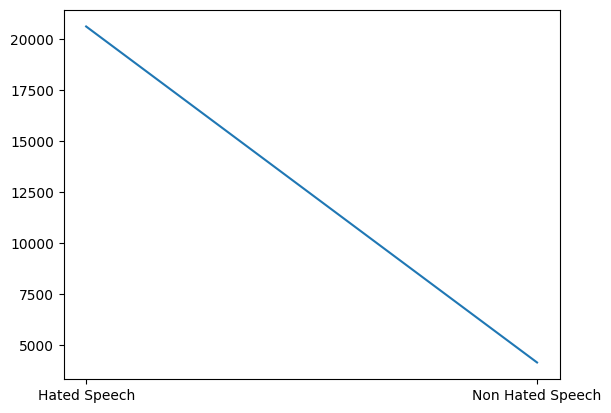

In [18]:
plt.plot(urdu_doc['Labels'].value_counts())

In [19]:
urdu_doc['Labels'].value_counts()

Hated Speech        20620
Non Hated Speech     4163
Name: Labels, dtype: int64

In [20]:
!pip install neattext

-------------------------------------------
Installing UrduHack Libraries

In [21]:
!pip install urduhack


In [22]:
import urduhack

-------------------------------------------
Removing unwanted data and tokenizing

In [23]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download Urdu stopwords
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
def removing_unwanted_data(text):

    # Format words and remove unwanted characters
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)

    words = word_tokenize(text)

    stop_words = {
      'ہے', 'کو', 'کے', 'سے', 'کی', 'میں', 'پر', 'یا', 'ہیں', 'کرنے',
      'کرتے', 'کریں', 'تھا', 'تھی', 'رہا', 'رہی', 'رہے', 'جب', 'کچھ',
      'اب', 'تک', 'ہوتا', 'ہوتی', 'ہوتے', 'تو', 'کچھ', 'بہت', 'تھے',
      'کچھ', 'کافی', 'جیسے', 'ہوگیا', 'تھے', 'کب', 'کیوں', 'کہاں',
      'یہاں', 'وہاں', 'کیا', 'ہی', 'نہیں', 'جی', 'ہاں', 'نہ', 'اور',
      'لیکن', 'پھر', 'مگر', 'لیکن', 'لہٰذا', 'یعنی', 'اس', 'کیونکہ',
      'تاکہ', 'تاہم', 'بعد', 'پہلے', 'شاید', 'ہو', 'نے', 'رکھیں',
      'ہر', 'بعض', 'مثلاً', 'کون', 'کس', 'کہ', 'اِس', 'اُس', 'اِسکے',
      'اُسکے', 'کچھ', 'کچھ', 'اِسلئے', 'اُسلئے', 'وہ', 'وہاں', 'سب',
      'ایسا', 'اِسی', 'اُسی', 'کوئی', 'کوئی', 'کوئے', 'جو', 'جِس', 'جِسے',
      'یہ', 'وہ', 'کچھ', 'جِن', 'جِنہیں', 'سارے', 'کئی', 'تمام',
      'اسے', 'ان', 'انہوں', 'انہیں', 'جن', 'جنہوں', 'جنہیں',
      'تو', 'تم', 'تمھارا', 'تمھاری', 'تمھارے', 'اپنا', 'اپنی', 'اپنے',
      'اپنی', 'اِس', 'اُس', 'اِسکا', 'اُسکا', 'اِسکی', 'اُسکی', 'اِسکے',
      'اُسکے', 'اِسی', 'اُسی', 'کوئی', 'کوئی', 'کوئے', 'یہ', 'وہ',
      'کچھ', 'جِن', 'جِنہیں', 'سارے', 'کئی', 'تمام', 'اسے', 'ان',
      'انہوں', 'انہیں', 'جن', 'جنہوں', 'جنہیں', 'تو', 'تم', 'تمھارا',
      'تمھاری', 'تمھارے', 'اپنا', 'اپنی', 'اپنے', 'اپنی', 'اِس', 'اُس',
      'اِسکا', 'اُسکا', 'اِسکی', 'اُسکی', 'اِسکے', 'اُسکے', 'اِسی',
      'اُسی', 'کوئی', 'کوئی', 'کوئے', 'جو', 'جِس', 'جِسے'
    }

    # Filter out stopwords from the text
    filtered_words = [word for word in words if word.casefold() not in stop_words]

    # Join the filtered words back into a sentence
    text = ' '.join(filtered_words)

    # Tokenize each word
    text =  nltk.WordPunctTokenizer().tokenize(text)

    return text

urdu_doc['Tweet'] = urdu_doc['Tweet'].apply(removing_unwanted_data)


In [25]:
urdu_doc.head()

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet,Labels
0,0,3,0,0,3,0,"[ایک, عورت, طور, آپ, گھر, صفائی, بارے, شکایت, ...",Non Hated Speech
1,1,3,0,3,0,1,"[لڑکا, ٹھنڈا, ٹائیگا, ڈان, براڈ, فار, کفن, ڈاٹ...",Hated Speech
2,2,3,0,3,0,1,"[آپ, کبھی, کسی, کتیا, چود, لیا, رونے, لگی, ہے,...",Hated Speech
3,3,3,0,2,1,1,"[ایک, ٹرانی, طرح, نظر, آتی, ہے, ۔]",Hated Speech
4,4,6,0,6,0,1,"[آپ, میرے, بارے, گندگی, سنی, سچ, سکتی, کتیا, ز...",Hated Speech


-------------------------------------------
Lemmatizing of urdu words

In [26]:
from nltk.stem import WordNetLemmatizer

def lemmatize_urdu_text(text):
    if isinstance(text, str):
        lemmatizer = WordNetLemmatizer()
        urdu_words = nltk.word_tokenize(text)
        lemmatized_words = [lemmatizer.lemmatize(word) for word in urdu_words]
        lemmatized_text = ' '.join(lemmatized_words)
        return lemmatized_text
    else:
        return text


In [27]:
urdu_doc.head()

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet,Labels
0,0,3,0,0,3,0,"[ایک, عورت, طور, آپ, گھر, صفائی, بارے, شکایت, ...",Non Hated Speech
1,1,3,0,3,0,1,"[لڑکا, ٹھنڈا, ٹائیگا, ڈان, براڈ, فار, کفن, ڈاٹ...",Hated Speech
2,2,3,0,3,0,1,"[آپ, کبھی, کسی, کتیا, چود, لیا, رونے, لگی, ہے,...",Hated Speech
3,3,3,0,2,1,1,"[ایک, ٹرانی, طرح, نظر, آتی, ہے, ۔]",Hated Speech
4,4,6,0,6,0,1,"[آپ, میرے, بارے, گندگی, سنی, سچ, سکتی, کتیا, ز...",Hated Speech


In [28]:
# Assuming you have a Pandas DataFrame with a column named 'Tweet' containing Urdu text
urdu_doc['Lemmatized Tweet'] = urdu_doc['Tweet'].apply(lemmatize_urdu_text)


In [29]:
urdu_doc.head()

,Serial No.,Count,Hate Speech,Offensive Language,Neither,Class,Tweet,Labels,Lemmatized Tweet
0,0,3,0,0,3,0,"[ایک, عورت, طور, آپ, گھر, صفائی, بارے, شکایت, ...",Non Hated Speech,"[ایک, عورت, طور, آپ, گھر, صفائی, بارے, شکایت, ..."
1,1,3,0,3,0,1,"[لڑکا, ٹھنڈا, ٹائیگا, ڈان, براڈ, فار, کفن, ڈاٹ...",Hated Speech,"[لڑکا, ٹھنڈا, ٹائیگا, ڈان, براڈ, فار, کفن, ڈاٹ..."
2,2,3,0,3,0,1,"[آپ, کبھی, کسی, کتیا, چود, لیا, رونے, لگی, ہے,...",Hated Speech,"[آپ, کبھی, کسی, کتیا, چود, لیا, رونے, لگی, ہے,..."
3,3,3,0,2,1,1,"[ایک, ٹرانی, طرح, نظر, آتی, ہے, ۔]",Hated Speech,"[ایک, ٹرانی, طرح, نظر, آتی, ہے, ۔]"
4,4,6,0,6,0,1,"[آپ, میرے, بارے, گندگی, سنی, سچ, سکتی, کتیا, ز...",Hated Speech,"[آپ, میرے, بارے, گندگی, سنی, سچ, سکتی, کتیا, ز..."


------------------------------------------------
**Feature Engineering**

Since machine learning models do not accept the raw text as input data, we need to convert “Tweets” into vectors of numbers.
There are different ways of transforming text into numeric vectors.
In this analysis, I’ve applied first Bag of Words, followed by Bag-of-n-Grams, and later I’ve moved to Tf-Idf which is a more complex representation.
I’ve aimed to model two different classification by using these methodologies and compare their performances on Amazon’s dataset.
Bag of word (BOW)

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.


In [30]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have a list of lemmatized Urdu tweets in the 'Lemmatized Tweet' column of your DataFrame
lemmatized_tweets = urdu_doc['Lemmatized Tweet'].tolist()

# Initialize the CountVectorizer with the tokenizer and lowercase settings
BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

# Fit and transform the lemmatized tweet data
x = BOW_convert.fit_transform(lemmatized_tweets)

# Get the feature names
words = BOW_convert.vocabulary_.keys()

# Print the feature names and shape of the transformed array
print("The total number of columns is =", len(words))
print('Shape of arrays =', x.toarray().shape)


The total number of columns is = 13902
Shape of arrays = (24783, 13902)


Since bag-of-words representation converts text into a “flat vector of numbers”, it does not remember any original textual sequence and it can destroy the semantic meaning of the text.
In other words, it only records how many times each word appears in the text and it does not give any importance to their order. Each word count becomes a dimension for that specific word.

In [31]:
# import sklearn.model_selection

# from sklearn.linear_model import LogisticRegression
# X = urdu_doc['Lemmatized Tweet','Count','Hate Speech','Offensive Language']
# y = urdu_doc['Labels']
# train,test= sklearn.model_selection.train_test_split(urdu_doc, train_size = 0.8, random_state=42)

# print('Training data set shape =',train.shape)

# print('Testing data set shape =',test.shape)
import sklearn.model_selection

from sklearn.linear_model import LogisticRegression

X = urdu_doc[['Lemmatized Tweet', 'Count', 'Hate Speech', 'Offensive Language']]
y = urdu_doc['Labels']

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, train_size=0.8, random_state=42)

print('Training data set shape =', X_train.shape)
print('Testing data set shape =', X_test.shape)


Training data set shape = (19826, 4)
Testing data set shape = (4957, 4)



BOW Transformation

Converting the training and testing data into BOW array


In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression


In [33]:
BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)


In [34]:
# Transform training and testing data
X_train_text = X_train['Lemmatized Tweet']
X_test_text = X_test['Lemmatized Tweet']
X_train_transformed = BOW_convert.fit_transform(X_train_text)
# BOW transformation for test data
X_test_text_transformed = BOW_convert.transform(X_test_text)


In [35]:
# Combine transformed text and numeric features for training data
X_train_numeric =  X_train[['Count', 'Hate Speech', 'Offensive Language']].values.astype(np.float64)
X_train_combined = np.hstack((X_train_transformed.toarray(), X_train_numeric))


In [36]:
# Combine transformed text and numeric features for testing data
X_test_numeric = X_test[['Count', 'Hate Speech', 'Offensive Language']].values.astype(np.float64)
X_test_combined = np.hstack((X_test_text_transformed.toarray(), X_test_numeric))


In [37]:
# Train logistic regression model
model = LogisticRegression()
model.fit(X_train_combined, y_train)

LogisticRegression()

applying SVM

In [38]:
# Predict with test data
y_pred_test = model.predict(X_test_combined)
print(y_pred_test)

['Hated Speech' 'Hated Speech' 'Non Hated Speech' ... 'Hated Speech'
 'Hated Speech' 'Hated Speech']


In [39]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train_combined, y_train)


SVC()

In [41]:
# y_pred = clf.predict(X_test_combined)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)
# new_input = ['کتیا، مدر فیکر کے پاس جاؤ']
# new_input_tfidf = BOW_convert.transform(new_input)
# # new_input_tfidf = BOW_convert.transform(BOW_convert.transform(new_input))
# new_prediction = clf.predict(new_input_tfidf)
# print('Prediction for new input:', new_prediction)


In [42]:
# dlf = DecisionTreeClassifier()
# dlf.fit(X_train_combined, y_train)
# y_pred = dlf.predict(X_test_combined)
# accuracy = accuracy_score(y_test, y_pred_test)
# print('Accuracy:', accuracy)
# new_input = ['آپ خوبصورت ہو']
# new_input_tfidf = BOW_convert.transform(new_input)
# # new_input_tfidf = BOW_convert.transform(BOW_convert.transform(new_input))
# new_prediction = dlf.predict(new_input_tfidf)
# print('Prediction for new input:', new_prediction)


In [43]:
# from sklearn.naive_bayes import MultinomialNB
# mnb = MultinomialNB()
# mnb.fit(X_train_combined, y_train)
# y_pred = mnb.predict(X_test_text_transformed)
# accuracy = accuracy_score(y_test, y_pred_test)
# print('Accuracy:', accuracy)
# new_input = ['گندگی مجھے اڑا دیتی ہے..آپ کا دعویٰ ہے کہ آپ اتنے وفادار اور کسی کے لیے نیچے ہیں لیکن پھر بھی کدالوں سے لڑ رہے ہیں']

# new_input_tfidf = BOW_convert.transform(BOW_convert.transform(new_input))
# new_prediction = mnb.predict(new_input_tfidf)
# print('Prediction for new input:', new_prediction)


In [44]:
# Verify shapes of transformed test data and model coefficients
print("Shape of X_test_transformed:", X_train_transformed.shape)
print("Shape of model coefficients:", model.coef_.shape)


Shape of X_test_transformed: (19826, 12610)
Shape of model coefficients: (1, 12613)


In [45]:
# Verify shapes of transformed test data and model coefficients
print("Shape of X_test_transformed:", X_test_text_transformed.shape)
print("Shape of model coefficients:", model.coef_.shape)


Shape of X_test_transformed: (4957, 12610)
Shape of model coefficients: (1, 12613)


In [46]:
new_input = ['آپ خوبصورت ہو']

# new_input = ['کتیا، مدر فیکر کے پاس جاؤ']
# new_input = [' "کتیا مجھ سے اٹھو"'] # Bi*ch get over me
new_input_transformed = BOW_convert.transform(new_input)
new_input_numeric = np.array([100, 1, 0], dtype=np.float64).reshape(1, -1)
new_input_combined = np.hstack((new_input_transformed.toarray(), new_input_numeric))
new_prediction = model.predict(new_input_combined)

# Print results
print('Test data prediction:', y_pred_test)
print('Prediction for new input data:', new_prediction)

accuracy = accuracy_score(y_test, y_pred_test)

# Print the accuracy
print("Accuracy:", accuracy)

Test data prediction: ['Hated Speech' 'Hated Speech' 'Non Hated Speech' ... 'Hated Speech'
 'Hated Speech' 'Hated Speech']
Prediction for new input data: ['Non Hated Speech']
Accuracy: 0.9997982650796853


---------------------------------------------------------------


---------------------------------------------------------------


In [47]:

X_text = urdu_doc['Lemmatized Tweet']
X_count = urdu_doc['Count']
X_hate_speech = urdu_doc['Hate Speech']
X_offensive_language = urdu_doc['Offensive Language']
X_neither = urdu_doc['Neither']
X_class = urdu_doc['Class']
y = urdu_doc['Labels']

X_train_text, X_test_text, X_train_count, X_test_count, X_train_hate_speech, X_test_hate_speech, X_train_offensive_language, X_test_offensive_language, X_train_neither, X_test_neither, X_train_class, X_test_class, y_train, y_test = sklearn.model_selection.train_test_split(
    X_text, X_count, X_hate_speech, X_offensive_language, X_neither, X_class, y, train_size=0.8, random_state=42
)

print('Training data set shape =', X_train_text.shape)
print('Testing data set shape =', X_test_text.shape)

BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

X_train_text_transformed = BOW_convert.fit_transform(X_train_text)
X_test_text_transformed = BOW_convert.transform(X_test_text)

X_train_numeric = np.column_stack((
    X_train_count, X_train_hate_speech, X_train_offensive_language, X_train_neither
)).astype(np.float64)  # Convert the numeric features to float64
X_test_numeric = np.column_stack((
    X_test_count, X_test_hate_speech, X_test_offensive_language, X_test_neither
)).astype(np.float64)  # Convert the numeric features to float64

X_train_combined = np.hstack((X_train_text_transformed.toarray(), X_train_numeric))
X_test_combined = np.hstack((X_test_text_transformed.toarray(), X_test_numeric))

model = LogisticRegression()
model.fit(X_train_combined, y_train)


Training data set shape = (19826,)
Testing data set shape = (4957,)


LogisticRegression()

In [48]:
# new_input = ['کتیا، مدر فیکر کے پاس جاؤ']
new_input = [' "کتیا مجھ سے اٹھو"'] # Bi*ch get over me
# new_input = ['گندگی مجھے اڑا دیتی ہے..آپ کا دعویٰ ہے کہ آپ اتنے وفادار اور کسی کے لیے نیچے ہیں لیکن پھر بھی کدالوں سے لڑ رہے ہیں']
new_input_transformed = BOW_convert.transform(new_input)
new_input_numeric = np.array([100, 1, 0, 0]).reshape(1, -1)  # Replace with actual values for numeric features
new_input_numeric = new_input_numeric.astype(np.float64)  # Convert the numeric features to float64
new_input_combined = np.hstack((new_input_transformed.toarray(), new_input_numeric))

new_prediction = model.predict(new_input_combined)
print('Prediction for new input:', new_prediction)


Prediction for new input: ['Hated Speech']


In [49]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, confusion_matrix

# Assuming you already have the model trained and the X_test_combined and y_test data prepared

# Make predictions on the test data
y_pred = model.predict(X_test_combined)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

print("Precision:", precision)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)


Precision: 0.9997985063893985
Accuracy: 0.9997982650796853
Recall: 0.9997982650796853
F1 Score: 0.9997983132064746
Confusion Matrix:
[[4121    1]
 [   0  835]]


In [ ]:
X_text = urdu_doc['Tweet']
X_count = urdu_doc['Count']
X_hate_speech = urdu_doc['Hate Speech']
X_offensive_language = urdu_doc['Offensive Language']
X_neither = urdu_doc['Neither']
X_class = urdu_doc['Class']
y = urdu_doc['Labels']


In [ ]:
X_text_transformed = BOW_convert.fit_transform(X_text)


In [ ]:
import numpy as np

X_text_transformed = X_text_transformed.toarray()  # Convert sparse matrix to a dense array

X_numeric = np.hstack((X_count.values.reshape(-1, 1),
                       X_hate_speech.values.reshape(-1, 1),
                       X_offensive_language.values.reshape(-1, 1),
                       X_neither.values.reshape(-1, 1),
                       X_class.values.reshape(-1, 1)))

X_combined = np.hstack((X_text_transformed, X_numeric))


In [ ]:
model = LogisticRegression()
model.fit(X_combined, y)


In [ ]:
new_input = ['گندگی مجھے اڑا دیتی ہے..آپ کا دعویٰ ہے کہ آپ اتنے وفادار اور کسی کے لیے نیچے ہیں لیکن پھر بھی کدالوں سے لڑ رہے ہیں']

new_text_transformed = BOW_convert.transform(new_input)
predictions = model.predict(new_text_transformed)

In [ ]:
BOW_convert = CountVectorizer(tokenizer=lambda doc: doc, lowercase=False)

X_train = BOW_convert.fit_transform(X_train['Lemmatized Tweet'])

X_test=BOW_convert.transform(X_test['Lemmatized Tweet'])

y_train=y_train['Labels']
y_test=y_test['Labels']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
tfidf_transform = text.TfidfTransformer(norm=None)

X_train_tfidf = tfidf_transform.fit_transform(X_train)

In [ ]:
X_test_tfidf = tfidf_transform.transform(X_test)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_tfidf, y_train)
y_pred = logreg.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print('Accuracy:', accuracy)
new_input = [' "کتیا مجھ سے اٹھو"'] # Bi*ch get over me
new_input_tfidf = tfidf_transform.transform(BOW_convert.transform(new_input))
new_prediction = logreg.predict(new_input_tfidf)
print('Prediction for new input:', new_prediction)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
print("-------------------------------------------------")
print("-------------------------------------------------")
print("-------------------------------------------------")

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(" ")

print("Accuracy:", accuracy)
print(" ")
print("-------------------------------------------------")
# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print(" ")

print("Precision:", precision)
print(" ")

print("-------------------------------------------------")

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print(" ")

print("Recall:", recall)
print(" ")

print("-------------------------------------------------")

# Calculate F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(" ")

print("F1 Score:", f1)
print(" ")

print("-------------------------------------------------")
print("-------------------------------------------------")
print("-------------------------------------------------")

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


In [ ]:
score=[]
name=[]
def logistic_regression(X_tr, y_tr, X_te, y_te, description):
    model = LogisticRegression().fit(X_tr, y_tr)
    s = model.score(X_te, y_te)
    score.append(s)
    name.append(description)
    print('Testing Score with', description, 'features', score)
    return s


In [ ]:
from sklearn import svm
clf = svm.SVC()

clf.fit(X_train, y_train)

ss=clf.score(X_test,y_test)
score.append(ss)
name.append('SVM-BOW')

# get the accuracy
print('Testing Score of SVM with BOW method ', score)

In [ ]:
# y_pred = clf.predict(X_test_tfidf)
# accuracy = accuracy_score(y_test, y_pred)
# print('Accuracy:', accuracy)
# new_input = ['گندگی مجھے اڑا دیتی ہے..آپ کا دعویٰ ہے کہ آپ اتنے وفادار اور کسی کے لیے نیچے ہیں لیکن پھر بھی کدالوں سے لڑ رہے ہیں']
# new_input_tfidf = tfidf_transform.transform(BOW_convert.transform(new_input))
# new_prediction = clf.predict(new_input_tfidf)
# print('Prediction for new input:', new_prediction)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

In [ ]:
new_input = ['گندگی مجھے اڑا دیتی ہے..آپ کا دعویٰ ہے کہ آپ اتنے وفادار اور کسی کے لیے نیچے ہیں لیکن پھر بھی کدالوں سے لڑ رہے ہیں']
new_input_tfidf = tfidf_transform.transform(BOW_convert.transform(new_input))
new_prediction = clf.predict(new_input_tfidf)
print('Prediction for new input:', new_prediction)


In [ ]:
dlf = DecisionTreeClassifier()
dlf.fit(X_train_tfidf, y_train)
y_pred = dlf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
new_input = ['آپ خوبصورت ہو']
new_input_tfidf = tfidf_transform.transform(BOW_convert.transform(new_input))
new_prediction = dlf.predict(new_input_tfidf)
print('Prediction for new input:', new_prediction)


In [ ]:
dlf.fit(X_train_tfidf, y_train)
y_pred = dlf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
new_input = ['آپ خوبصورت ہو']
new_input_tfidf = tfidf_transform.transform(BOW_convert.transform(new_input))
new_prediction = dlf.predict(new_input_tfidf)
print('Prediction for new input:', new_prediction)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
y_pred = mnb.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
new_input = ['گندگی مجھے اڑا دیتی ہے..آپ کا دعویٰ ہے کہ آپ اتنے وفادار اور کسی کے لیے نیچے ہیں لیکن پھر بھی کدالوں سے لڑ رہے ہیں']

new_input_tfidf = tfidf_transform.transform(BOW_convert.transform(new_input))
new_prediction = mnb.predict(new_input_tfidf)
print('Prediction for new input:', new_prediction)


In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb.fit(X_train_tfidf, y_train)
y_pred = mnb.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
new_input = ['گندگی مجھے اڑا دیتی ہے..آپ کا دعویٰ ہے کہ آپ اتنے وفادار اور کسی کے لیے نیچے ہیں لیکن پھر بھی کدالوں سے لڑ رہے ہیں']

new_input_tfidf = tfidf_transform.transform(BOW_convert.transform(new_input))
new_prediction = mnb.predict(new_input_tfidf)
print('Prediction for new input:', new_prediction)
